In [1]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

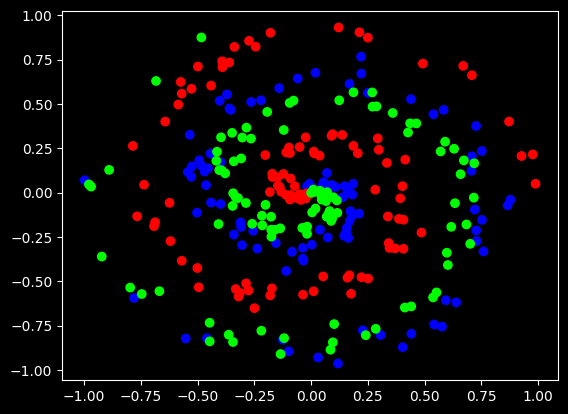

In [7]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
x, y = spiral_data(samples=100, classes=3)
plt.scatter(x[:,0], x[:, 1], c=y, cmap='brg')
plt.show()


In [2]:
class DenseLayer:
    # Layer initilization
    def __init__(self, n_inputs, n_neurons):
        self.weights=0.01*np.random.randn(n_inputs, n_neurons)
        self.biases=np.zeros((1, n_neurons))

    # forward pass
    def forward(self, inputs):
        # calculate the output values from inputs, weights and outputs
        self.output = np.dot(inputs, self.weights) + self.biases
    

In [3]:
# create dataset
x, y = spiral_data(samples=100, classes=3)

# dense layer with 2 input features and 3 output values
dense1 = DenseLayer(2,3)

# perform forward pass
dense1.forward(x)

# output of the each neuron (3 neuron 3 outputs)
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


<div class="alert alert-block alert-success"><b>ACTIVATION FUNCTION: RELU<b><div>

In [4]:
import numpy as np

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [5]:
# Relu activation
class ReLU_Activation:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

<div class="alert alert-block alert-success"><b>ACTIVATION FUNCTION: SOFTMAX<b><div>

In [ ]:
inputs = [[1,2,3,2.5],
          [2.,5.,-1.,2],
          [-1.5,2.7,3.3,-0.8]]

# get unnormalized probabilities
exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
# normalize them each for sample
probabilites=exp_values/np.sum(exp_values, axis=1, keepdims=True)
print(probabilites)
np.sum(probabilites, axis=1)

In [8]:
# softmax activation

class Softmax_Activation:
    # forward pass
    def forward(self, inputs):
        # get unnormalized probabilities
        exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        # normalize them each for sample
        probabilites=exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output=probabilites

In [9]:
# create dataset
x, y = spiral_data(samples=100, classes=3)

# dense layer with 2 input features and 3 output values
dense1 = DenseLayer(2,3)

# create activation ReLU (to be used with dense layer)
activation1 = ReLU_Activation()

# create second dense layer with 3 input features (as
# we take output of privious layer here) and 3 output values
dense2 = DenseLayer(3,3)

# create softmax activation 
activation2 = Softmax_Activation()

# make the forward pass of our training data
dense1.forward(x)

# apply relu activation function to dense layer 1 neurons
activation1.forward(dense1.output)

# make the forward pass through second dense layer 
# it take the output of activation fuction of first layer as input
dense2.forward(activation1.output)

# make the forward pass through activation function
# it take the input as output of second dense layer
activation2.forward(dense2.output)

# Let's see the output of first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.33333343 0.3333333 ]
 [0.33333278 0.3333338  0.33333343]
 [0.3333324  0.33333403 0.33333358]
 [0.33333266 0.3333341  0.33333325]]


<div class="alert alert-block alert-success"><b>CALCULATING NETWORK ERROR WITH LOSS<b><div>

<div class="alert alert-block alert-warning"><i>CROSS ENTROY LOSS<i><div>

In [1]:
import numpy as np

In [2]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])

class_targets = [0, 1, 1]
print(softmax_outputs[[0,1,2], class_targets])

[0.7 0.5 0.9]


In [7]:
print(-np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
]))

neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
])

average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [4]:
op = np.array([[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])

true = [0, 1, 1]

In [8]:
np.argmax(op[0])

np.int64(0)